In [ ]:
import torch

import math
from math import *
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from numpy.linalg import norm

np.random.seed(21)

#First I have solved for degree 2. Then I have buit genral model to optimise it.


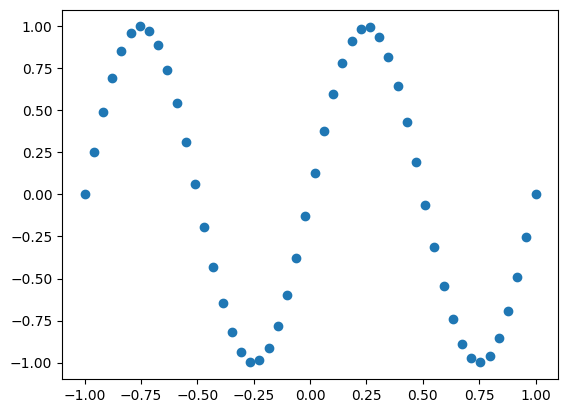

In [ ]:
x= np.linspace(-1,1,50)

y= np.sin(2*np.pi*x)

plt.scatter(x,y)

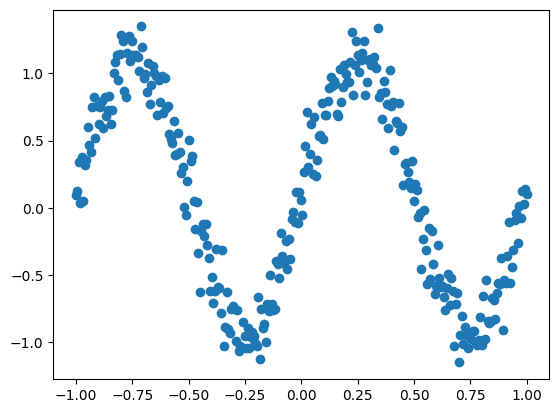

In [ ]:
a=300
x= np.linspace(-1,1,a)

noise= np.random.normal(0.1,0.15,a)


y= np.sin(2*np.pi*x)
y=y+ noise
plt.figure()
plt.scatter(x,y)
# plt.plot(x,y,color="red")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)



In [ ]:
xtest

array([ 0.35785953,  0.77926421,  0.01672241, -0.93979933,  0.55852843,
        0.51170569,  0.31103679, -0.27090301, -0.96655518,  0.17056856,
        0.58528428, -0.6187291 ,  0.45819398, -0.69899666,  0.2173913 ,
        0.47826087,  0.93311037,  0.41137124, -0.01003344,  0.10367893,
       -0.47826087, -0.24414716,  0.66555184,  0.6722408 , -0.30434783,
       -0.71906355,  0.87959866,  0.97324415,  0.05016722,  0.59197324,
       -0.88628763,  0.09698997, -0.77926421, -0.83946488,  0.43812709,
       -0.20401338, -0.95317726, -0.39799331, -0.69230769, -0.51170569,
       -0.37792642, -0.4916388 ,  0.91304348, -0.59866221, -0.48494983,
       -0.57859532,  0.56521739,  0.53177258, -0.25752508,  0.5451505 ,
        0.20401338, -0.0367893 ,  0.59866221, -0.49832776,  0.98662207,
        0.85953177, -0.35117057, -0.38461538,  0.28428094, -0.83277592])

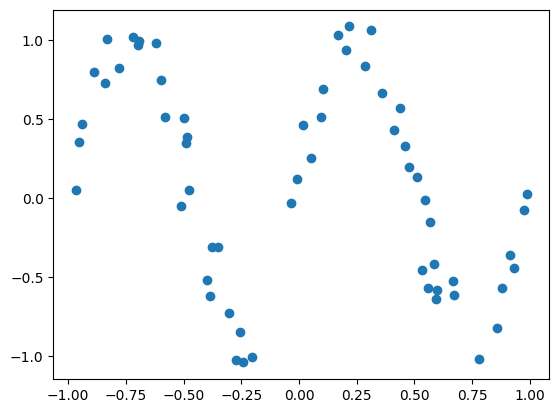

In [ ]:
plt.scatter(xtest,ytest)

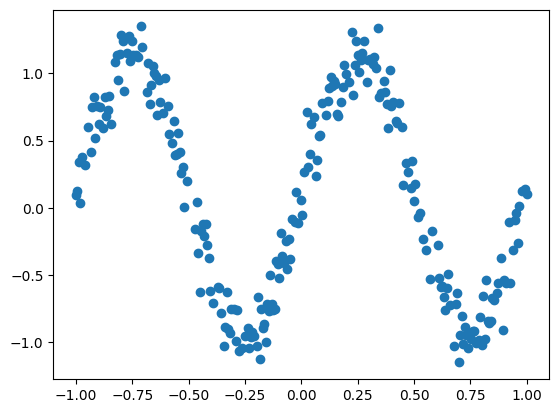

In [ ]:
plt.scatter(xtrain,ytrain)

In [ ]:
# y = wo + w1x + w2*x^2


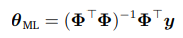

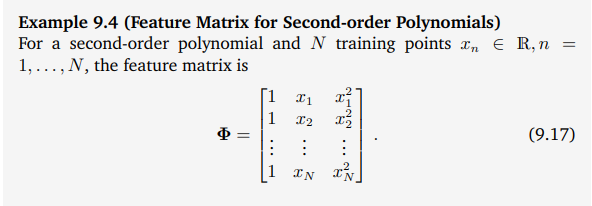

In [ ]:
# np.coloumn_stack
feature_matrix= [ ]
for i in range(len(xtrain)) :
  feature_matrix.append([1, xtrain[i], xtrain[i]*xtrain[i]])

feature_matrix= np.array(feature_matrix)
print(feature_matrix)

[[ 1.00000000e+00  5.51839465e-01  3.04526795e-01]
 [ 1.00000000e+00 -6.05351171e-01  3.66450040e-01]
 [ 1.00000000e+00 -9.59866221e-01  9.21343162e-01]
 [ 1.00000000e+00  2.37458194e-01  5.63863939e-02]
 [ 1.00000000e+00  1.57190635e-01  2.47088959e-02]
 [ 1.00000000e+00 -7.99331104e-01  6.38930213e-01]
 [ 1.00000000e+00 -8.52842809e-01  7.27340857e-01]
 [ 1.00000000e+00  7.12374582e-01  5.07477545e-01]
 [ 1.00000000e+00 -6.25418060e-01  3.91147750e-01]
 [ 1.00000000e+00  2.44147157e-01  5.96078344e-02]
 [ 1.00000000e+00 -2.77591973e-01  7.70573036e-02]
 [ 1.00000000e+00 -1.57190635e-01  2.47088959e-02]
 [ 1.00000000e+00  5.38461538e-01  2.89940828e-01]
 [ 1.00000000e+00  2.90969900e-01  8.46634825e-02]
 [ 1.00000000e+00 -1.37123746e-01  1.88029217e-02]
 [ 1.00000000e+00  8.86287625e-01  7.85505755e-01]
 [ 1.00000000e+00 -4.51505017e-01  2.03856780e-01]
 [ 1.00000000e+00 -4.38127090e-01  1.91955347e-01]
 [ 1.00000000e+00 -5.58528428e-01  3.11954005e-01]
 [ 1.00000000e+00  9.26421405e-

In [ ]:
from numpy.linalg import inv
Q_ML= np.linalg.inv((feature_matrix).T.dot(feature_matrix)).dot(feature_matrix.T).dot(ytrain)

print(Q_ML)

[ 0.09451712 -0.49467224  0.00893524]


In [ ]:
# np.coloumn_stack
feature_matrix_test= [ ]
for i in range(len(xtest)) :
  feature_matrix_test.append([1, xtest[i], xtest[i]*xtest[i]])

feature_matrix_test= np.array(feature_matrix_test)


In [ ]:
matrix_Q_ML=[]
for i in range(len(xtest)) :
  matrix_Q_ML.append(Q_ML)

matrix_Q_ML= np.array(matrix_Q_ML)

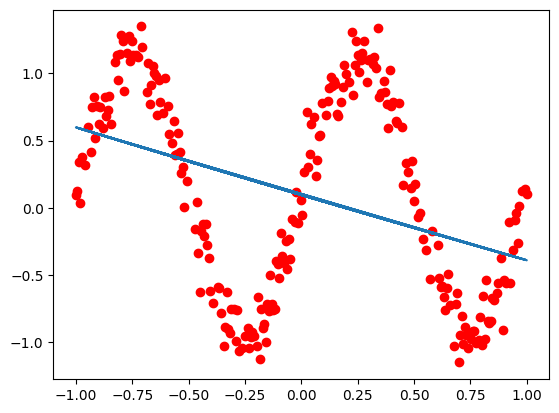

In [ ]:
plt.plot(xtrain,Q_ML.dot(feature_matrix.T))
plt.scatter(xtrain,ytrain, color="red")

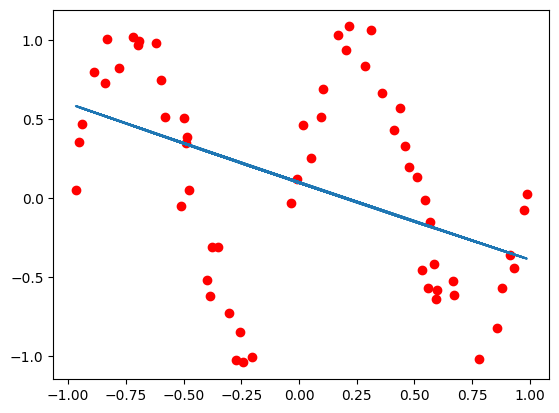

In [ ]:
plt.plot(xtest,Q_ML.dot(feature_matrix_test.T))
plt.scatter(xtest,ytest,color="red")

In [ ]:
# error

error = (ytest-Q_ML.dot(feature_matrix_test.T).T.dot(ytest-Q_ML.dot(feature_matrix_test.T)) )
print(error)

l2_norm = np.sum(np.power((error),2))

# take the square root of the sum of squares to obtain the L2 norm
l2_norm = np.sqrt(l2_norm)
print(l2_norm/error.size)

[ 1.32352011 -0.35948195  1.12189745  1.12966683  0.09427768  0.79289148
  1.72621911 -0.3667533   0.7142029   1.69416805  0.24636477  1.63966411
  0.99076428  1.62766625  1.74695907  0.85561152  0.22009641  1.08907524
  0.78008092  1.34960706  0.71166315 -0.37983001  0.13745972  0.04566545
 -0.06773538  1.67993675  0.09159953  0.58346878  0.91483154  0.02107934
  1.45607013  1.17445038  1.48330712  1.38692257  1.22958597 -0.34719797
  1.01704893  0.14490218  1.65449665  0.60938451  0.35368892  1.01137225
  0.30134371  1.40550274  1.0458268   1.17531639  0.50969013  0.20733478
 -0.18746374  0.64649817  1.60097034  0.62810836  0.07782167  1.16500785
  0.68962223 -0.16355299  0.3480141   0.04381698  1.49941004  1.66480586]
0.12898342212959737


In [ ]:
def row_maker(data,degree):
    poly=[]
    for i in range(degree+1):
      poly.append(pow(data,i))

    # print(degree,"respective poly ",poly)
    return poly

def Feature_Matrix_genrater(xtrain,degree):

    feature_matrix= [ ]
    for i in range(len(xtrain)) :
        feature_matrix.append(row_maker(xtrain[i],degree))
    feature_matrix= np.array(feature_matrix)
    return feature_matrix

def bestQ(xtrain,degree,ytrain):
  feature_matrix= Feature_Matrix_genrater(xtrain,degree)
  Q_ML= np.linalg.inv((feature_matrix).T.dot(feature_matrix)).dot(feature_matrix.T).dot(ytrain)
  return Q_ML

def training_graph(xtrain,degree,ytrain):
  Q_ML= bestQ(xtrain,degree,ytrain)
  feature_matrix= Feature_Matrix_genrater(xtrain,degree)
  plt.scatter(xtrain,Q_ML.dot(feature_matrix.T))
  plt.scatter(xtrain,ytrain, color="red")

def testing_graph(xtrain,ytrain,xtest,ytest,degree):
  Q_ML= bestQ(xtrain,degree,ytrain)
  feature_matrix_test= Feature_Matrix_genrater(xtest,degree)
  plt.scatter(xtest,Q_ML.dot(feature_matrix_test.T))
  plt.scatter(xtest,ytest,color="red")


def model(xtrain,ytrain,xtest,ytest):
    #returns which degree is best
    a=10000
    for i in range(1,10):
      if error_funtion(xtrain,ytrain,xtest,ytest,i) < a:
        a = error_funtion(xtrain,ytrain,xtest,ytest,i)
        b=i
    #b is least error
    print("The least error is obtained for ",b)
    training_graph(xtrain,b,ytrain)
def yfinal(xtrain,degree,Q_ML):
  feature_matrix_test= Feature_Matrix_genrater(xtest,degree)
  yfinal_f= Q_ML.dot(feature_matrix_test.T)
  yfinal_f=np.array(yfinal_f)
  return yfinal_f

def error_funtion(xtrain,ytrain,xtest,ytest,degree):
  feature_matrix_test= Feature_Matrix_genrater(xtest,degree)
  Q_ML= bestQ(xtrain,degree,ytrain)
  #error = (ytest-Q_ML.dot(feature_matrix_test.T).T.dot(ytest-Q_ML.dot(feature_matrix_test.T)) )
  error= np.power((ytest-yfinal(xtrain,degree,Q_ML)),2)
  l2_norm = np.sum(np.power((error),2))/error.size
  #print(degree,error)
  # l2_norm = np.sqrt(l2_norm)
  lists=[]
  lists.append(np.sqrt(l2_norm/error.size))
  lists.append(degree)

  return lists

In [ ]:
a=10000
for i in range(1,50):
  z = error_funtion(xtrain,ytrain,xtest,ytest,i)
  # if z[1] == i:
  print(i,"=",z[0])
  print()
  if z[0] < a:
    a = z[0]
    b= z[1]
print(b)

1 = 0.07120647844932759

2 = 0.07116148533254407

3 = 0.0594002093204502

4 = 0.05969365243746422

5 = 0.019068223830092233

6 = 0.019047917846729847

7 = 0.00843132739996946

8 = 0.00851526640536988

9 = 0.007362187939521636

10 = 0.007404451768633881

11 = 0.007444072426232559

12 = 0.007423546266924164

13 = 0.007473632621559339

14 = 0.007345968161541002

15 = 0.007335440496841385

16 = 0.0071575809670487555

17 = 0.007098272472970267

18 = 0.007117955300726808

19 = 0.007057324719671834

20 = 0.007243107054693979

21 = 0.0072256332999135475

22 = 0.007219364905146952

23 = 0.007038667634154996

24 = 0.007296760942678718

25 = 0.0072186145645357054

26 = 0.007235780362489155

27 = 0.007899880738479588

28 = 0.01451342232594516

29 = 0.007749792447436498

30 = 0.006229402394699103

31 = 0.00686751739018562

32 = 0.007639773238448665

33 = 0.006956468024503245

34 = 0.012079384556596953

35 = 0.00708912175145697

36 = 0.00827285047310605

37 = 0.011149070825243943

38 = 0.00572211377

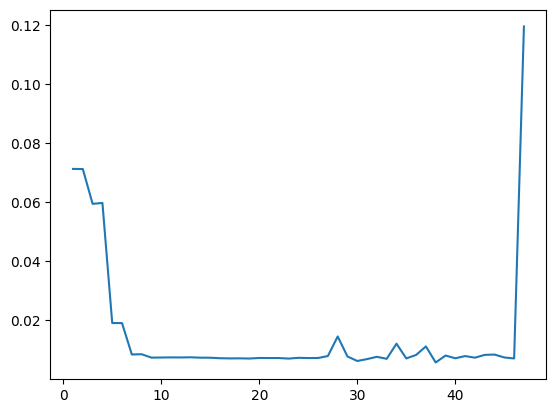

In [ ]:
y=[]
x=[]
for i in range(1,48):
  y.append(error_funtion(xtrain,ytrain,xtest,ytest,i)[0])
  x.append(i)

plt.plot(x,y)

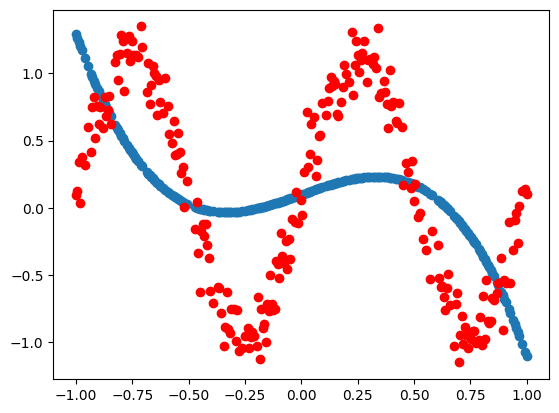

In [ ]:

  training_graph(xtrain,3,ytrain)

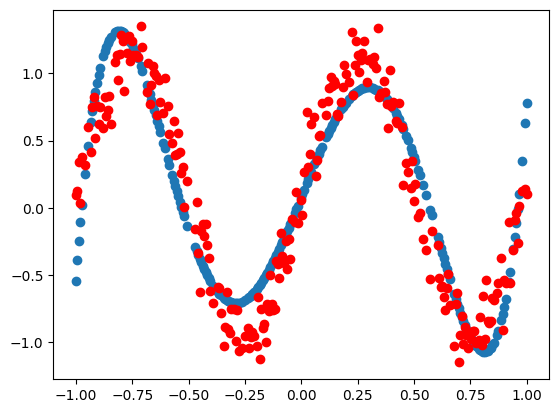

In [ ]:
 training_graph(xtrain,5,ytrain)

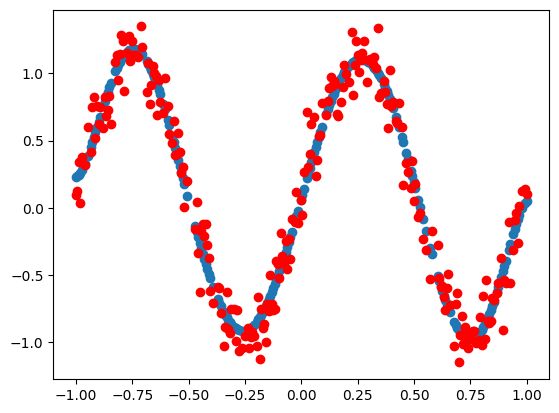

In [ ]:
 training_graph(xtrain,7,ytrain)

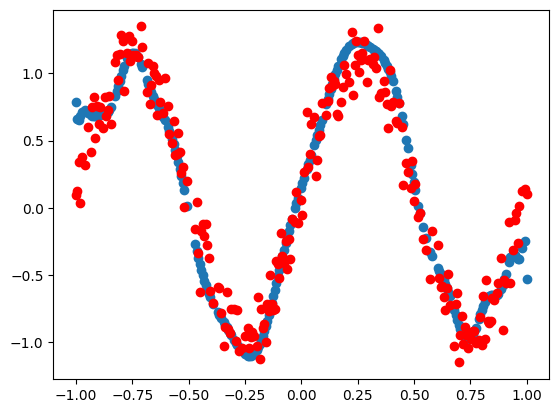

In [ ]:
training_graph(xtrain,28,ytrain)

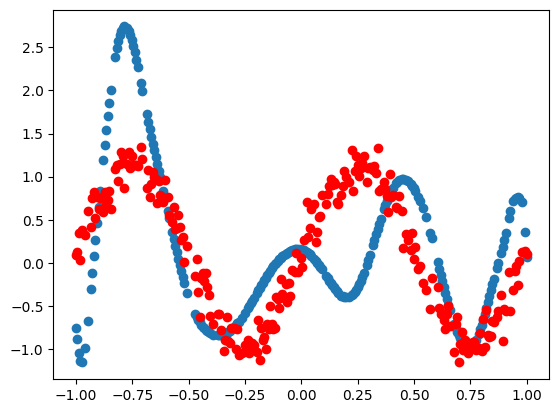

In [ ]:
training_graph(xtrain,47,ytrain)